# PART 1

# Python Coding and Data Set
Load in the data file and header file provided
The dataframe does not currently have a header, load in the header file and attach it to the dataframe
Comment on any steps you might take to evaluate or transform the dataset.
Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.
Write a function to generate bootstrap samples of the data.

In [146]:
# Importing needed libraries:
import numpy as np 
import pandas as pd 
import seaborn as sns   
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [307]:
# Importing dataset to an environment
df = pd.read_csv('breast-cancer.csv.txt')
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [308]:
# loading the header
f = open('field_names.txt', 'r')
f= list(f)
f = map(lambda s: s.strip('\n'), f)
f = list(f)

In [309]:
# Final dataset
df.columns = f
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [5]:
# Our Dataframe has 568 rows and 32 columns
df.shape

(568, 32)

In [6]:
# There is no NULLs in the dataframe
[col for col in df.columns if df[col].isnull().sum() > 0]

[]

In [7]:
# Only the dependent variable is a string so it needs to be encoded
df.dtypes

ID                              int64
diagnosis                      object
radius_mean                   float64
radius_sd_error               float64
radius_worst                  float64
texture_mean                  float64
texture_sd_error              float64
texture_worst                 float64
perimeter_mean                float64
perimeter_sd_error            float64
perimeter_worst               float64
area_mean                     float64
area_sd_error                 float64
area_worst                    float64
smoothness_mean               float64
smoothness_sd_error           float64
smoothness_worst              float64
compactness_mean              float64
compactness_sd_error          float64
compactness_worst             float64
concavity_mean                float64
concavity_sd_error            float64
concavity_worst               float64
concave_points_mean           float64
concave_points_sd_error       float64
concave_points_worst          float64
symmetry_mea

In [311]:
# There are only 2 unique values
df.diagnosis.value_counts()

B    357
M    211
Name: diagnosis, dtype: int64

In [310]:
# Encoding nominal variables
a = {'B':0, 'M':1}
df['diagnosis_binary'] = df['diagnosis'].map(a)
df.diagnosis_binary.value_counts()

0    357
1    211
Name: diagnosis_binary, dtype: int64

In [10]:
# To compare the means I'm going to use t-test for independent variables 
# to verify if the differences exist they are statistically significant
# H0 states that there is no significant different between variables
# H1 states 
# I take standard alpha as 0.05

In [11]:
from scipy.stats import ttest_ind

In [12]:
# p-value is extremelly low which means We can reject the null hipothesis
# There is a significant difference between these 2 samples
print(ttest_ind(df['smoothness_mean'][df['diagnosis_binary']==1], df['smoothness_mean'][df['diagnosis_binary']==0]))
print('means:')
print(df['smoothness_mean'][df['diagnosis_binary']==1].mean(), df['smoothness_mean'][df['diagnosis_binary']==0].mean())

Ttest_indResult(statistic=15.84876380973061, pvalue=4.369506674478879e-47)
means:
4.303715639810426 2.0003212885154062


In [31]:
# p-value is extremelly low which means We can reject the null hipothesis
# There is a significant difference between these 2 samples
print(ttest_ind(df['smoothness_sd_error'][df['diagnosis_binary']==1], df['smoothness_sd_error'][df['diagnosis_binary']==0]))
print('means:')
print(df['smoothness_sd_error'][df['diagnosis_binary']==1].mean(), df['smoothness_sd_error'][df['diagnosis_binary']==0].mean())

Ttest_indResult(statistic=15.518753789380055, pvalue=1.6351862476377743e-45)
means:
72.28981042654028 21.135148459383753


In [32]:
# p-value is over 0.05 - We are accept the null hipothesis
print(ttest_ind(df['smoothness_worst'][df['diagnosis_binary']==1], df['smoothness_worst'][df['diagnosis_binary']==0]))
print('means:')
print(df['smoothness_worst'][df['diagnosis_binary']==1].mean(), df['smoothness_worst'][df['diagnosis_binary']==0].mean())

Ttest_indResult(statistic=-1.588675351246254, pvalue=0.11269212065492089)
means:
0.00678190047393365 0.007195901960784313


In [499]:
# p-value is extremelly low which means We can reject the null hipothesis
# There is a significant difference between these 2 samples
print(ttest_ind(df['compactness_mean'][df['diagnosis_binary']==1], df['compactness_mean'][df['diagnosis_binary']==0]))
print('means:')
print(df['compactness_mean'][df['diagnosis_binary']==1].mean(), df['compactness_mean'][df['diagnosis_binary']==0].mean())

Ttest_indResult(statistic=7.232629631210526, pvalue=1.5460538808102787e-12)
means:
0.032201739336492896 0.021438246498599437


In [500]:
# p-value is extremelly low which means We can reject th null hipothesis
# There is a significant difference between these 2 samples
print(ttest_ind(df['compactness_sd_error'][df['diagnosis_binary']==1], df['compactness_sd_error'][df['diagnosis_binary']==0]))
print('means:')
print(df['compactness_sd_error'][df['diagnosis_binary']==1].mean(), df['compactness_sd_error'][df['diagnosis_binary']==0].mean())

Ttest_indResult(statistic=6.210086604218537, pvalue=1.025726185993116e-09)
means:
0.04176758293838863 0.02599673557422969


In [13]:
# p-value is extremelly low which means We can reject the null hipothesis
# There is a significant difference between these 2 samples
print(ttest_ind(df['compactness_worst'][df['diagnosis_binary']==1], df['compactness_worst'][df['diagnosis_binary']==0]))
print('means:')
print(df['compactness_worst'][df['diagnosis_binary']==1].mean(), df['compactness_worst'][df['diagnosis_binary']==0].mean())

Ttest_indResult(statistic=10.609699383947342, pvalue=4.1515207601172054e-24)
means:
0.015056635071090046 0.009857652661064425


In [ ]:
# Write a function to generate bootstrap samples of the data.

In [280]:
# statistical bootstrap function 
# as a statistic I'm going to use mean
import pylab

def bootstrap(data, num_samples, statistic, alpha):
    n = len(data)
    idx = np.random.randint(0, n, (num_samples, n))
    samples = data[idx]
    stat = np.sort(statistic(samples, 1))
    return (stat[int((alpha/2.0)*num_samples)],
            stat[int((1-alpha/2.0)*num_samples)])

In [306]:
# example:
bootstrap(df['compactness_worst'].values, 5, np.mean, 0.05)

(0.01148069190140845, 0.011975911971830986)

In [287]:
df['compactness_worst'].mean()

0.011788964788732394

In [289]:
data = np.array([1, 2, 3, 1000, 5])

In [290]:
bootstrap(data, 100000, np.mean, 0.05)

(1.8, 601.2)

In [291]:
np.std(data)

398.90219352618254

# Exploratory Analysis
Identify 2-3 variables that are predictive of a malignant tumor.

Display the relationship visually and write 1-2 sentences explaining the relationship.

In [ ]:
# to identify this I decided to use scikit learn Random Forest Classifier algorithm
# which provides the function feature importance.
# Returns the feature importances (the higher, the more important the feature) on the basis of variance
# Those operations I will be doing on train data only to prevent overfitting
# Before I will do this I'm going to scale all the dependent variables to enable the to
# have equal chances when it comes to predictive power

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [215]:
# Splitting the data into train and test set
# Additionally I'm removing ID variable as it has no impact on dependent variable
X = df.drop(['ID','diagnosis', 'diagnosis_binary'], axis = 1)
y = df['diagnosis_binary']

In [192]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [216]:
X1 = mms.fit_transform(X)
X = pd.DataFrame(X1, columns=X.columns)

In [171]:
X.head()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
2,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
3,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
4,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,0.551179,...,0.268232,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939


In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((397, 30), (171, 30))

In [179]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

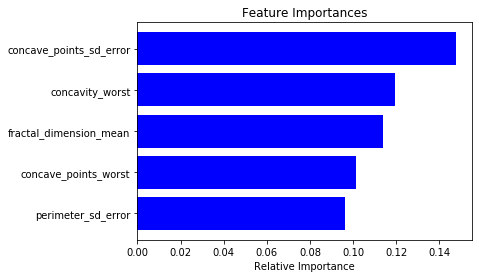

In [180]:
# Displaying top 5 predictive features
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[-5:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

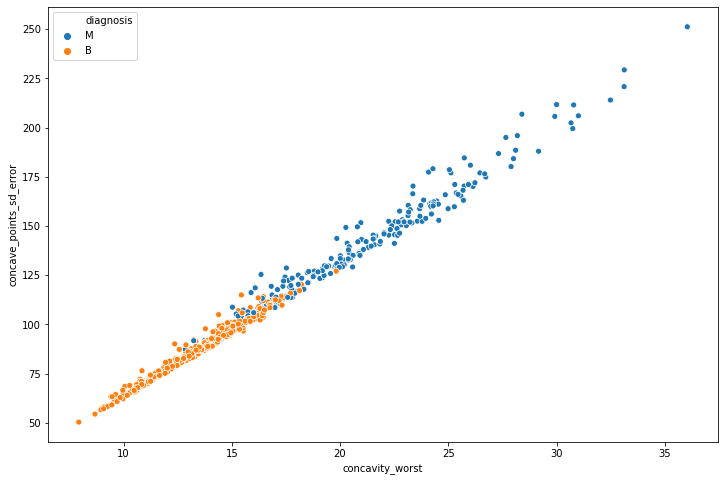

In [181]:
# On the plot can be captured that the higher concavity_worst and concave_points_sd_error
# The bigger propability that the patient has a malignant tumor
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'concavity_worst', y = 'concave_points_sd_error', data = df, hue = 'diagnosis')
plt.show()

# Modeling
Build a model to predict the malignant tumors.
Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
Identify how you would control for overfitting in each classification technique.
Evaluate the performance of each model.
In each model, identify the most important predictive variables and explain how you identified them.

In [ ]:
# First I'm going to reduce the dimensionality to improve performance and prevent overfitting
# and see how model will perform on the reduced data

In [218]:
X_train1 = mms.inverse_transform(X_train)
X_train = pd.DataFrame(X_train1, columns=X_train.columns)

In [219]:
# Removing correlated features
# as it's a food practice to avoid correlated features building predictive models
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  16


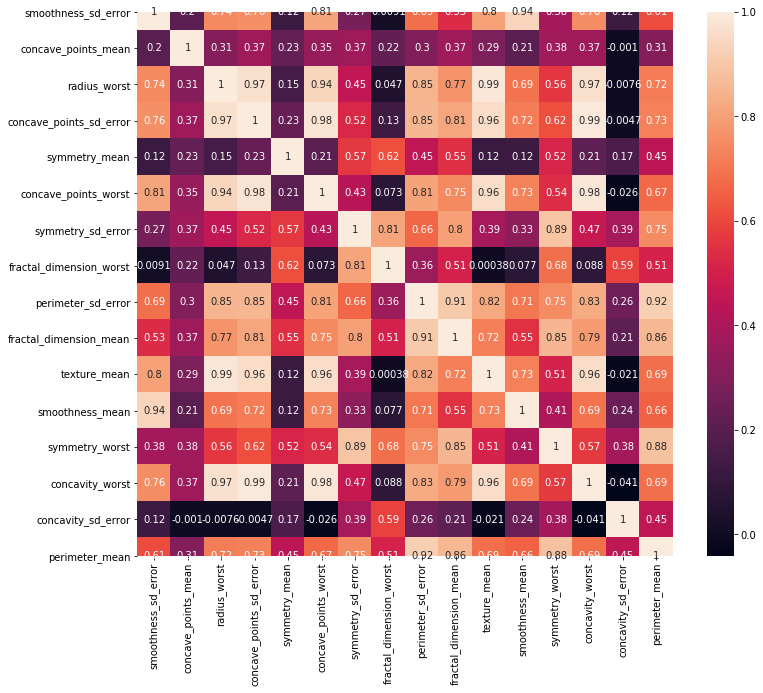

In [220]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[corr_features].corr(), annot = True)

In [221]:
# Top 5 correleted features
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,radius_mean,radius_worst,0.997541
1,radius_worst,radius_mean,0.997541
2,concave_points_sd_error,concavity_worst,0.993172
3,concavity_worst,concave_points_sd_error,0.993172
4,radius_mean,texture_mean,0.988432


In [222]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((397, 14), (171, 14))

In [223]:
# Then I'm going to detect "quasi-constant" features
# if they do not vary they don't seem to have an impact on dependent variable
# I set 0.01 as a threshold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)  

VarianceThreshold(threshold=0.01)

In [224]:
sum(sel.get_support())

4

In [225]:
quasi_constant_feat = [x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]
print('number of quasi constant features:', len(quasi_constant_feat),'\n',
'\n',quasi_constant_feat)

number of quasi constant features: 10 
 
 ['texture_sd_error', 'texture_worst', 'perimeter_worst', 'area_mean', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'fractal_dimension_sd_error']


In [226]:
X_train.drop(labels=quasi_constant_feat, axis=1, inplace=True)
X_test.drop(labels=quasi_constant_feat, axis=1, inplace=True)
X_train.shape, X_test.shape


((397, 4), (171, 4))

In [227]:
# I'm going to use Exhaustive selector to find most optimal pair of features to reduce the dimension even more
# The algorithm tests all the possible comninations of features and returns those with the best score
# This time as a score I choose roc_auc_score
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [228]:
efs = EFS(RandomForestClassifier(), 
           min_features=1,
           max_features=4, 
           scoring='roc_auc',
           print_progress=True,
           cv=2)

efs = efs.fit(X_train, y_train)

Features: 15/15

In [229]:
selected_feat= pd.DataFrame(X_train).columns[list(efs.best_idx_)]
selected_feat

Index(['radius_mean', 'radius_sd_error', 'area_sd_error', 'area_worst'], dtype='object')

In [230]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

X_train.shape, X_test.shape

((397, 4), (171, 4))

# Modeling
Build a model to predict the malignant tumors.
Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
Identify how you would control for overfitting in each classification technique.
Evaluate the performance of each model.
In each model, identify the most important predictive variables and explain how you identified them.

In [ ]:
# Due to the fact that the dependent variable is decently balanced(357:211)
# I decided to use accuracy as a metrics otherwise I would use the other
# To control overfitting I will use 5-fold cross validation 

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_validate

In [232]:
def models():
    return [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Extra Trees', ExtraTreesClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('XGboost', XGBClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('SVC', SVC()),
        ('AdaBoost', AdaBoostClassifier()),
        ('KNN', KNeighborsClassifier())
    ]

In [233]:
def plot_result(model_name, result, ylim=(0, 1.)):
    mean_train = np.round( np.mean(result['train_score']), 2)
    mean_test = np.round( np.mean(result['test_score']), 2)
    
    plt.title('{0}: cross validation\nmean-train-acc:{1}\nmean-test-acc:{2}'.format(model_name, mean_train, mean_test))
    plt.plot( result['train_score'], 'r-o', label="train" )
    plt.plot( result['test_score'], 'g-o', label="test" )
    plt.legend(loc='best')
    plt.ylabel('Accuracy')
    plt.xlabel('# of fold')
    plt.ylim(*ylim)
    plt.show()

Logistic Regression


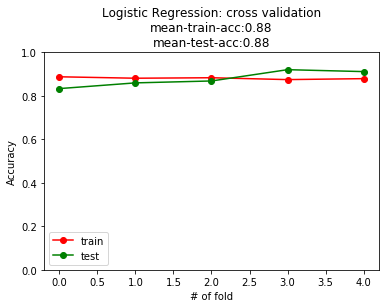

Decision Tree


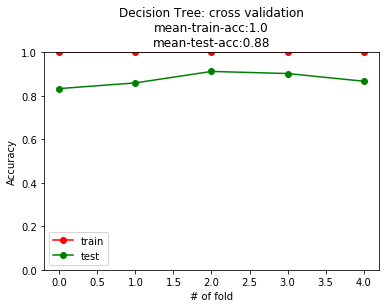

Random Forest


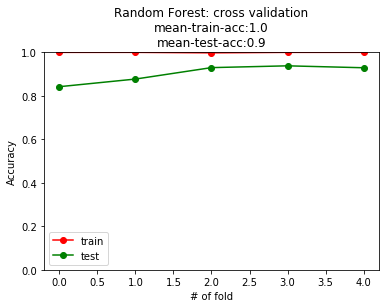

Extra Trees


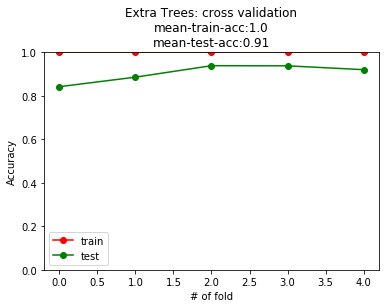

Gradient Boosting


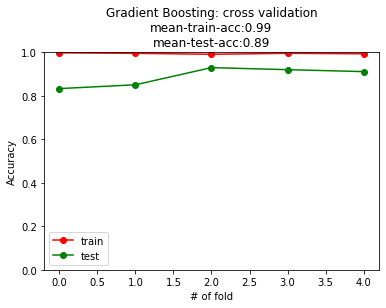

XGboost


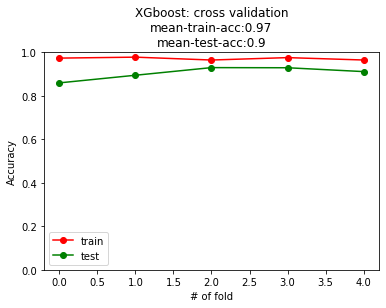

Naive Bayes


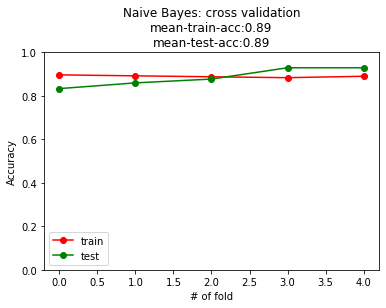

SVC


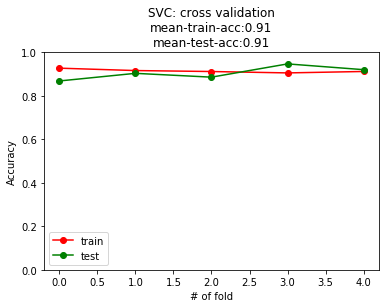

AdaBoost


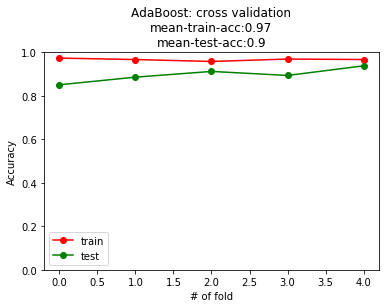

KNN


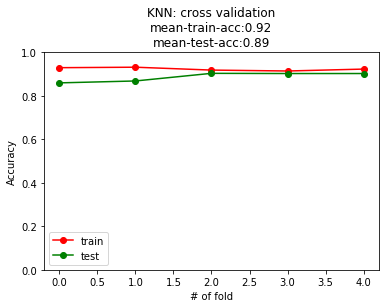

In [234]:

for model_name, model in models():
    result = cross_validate(model, X[X_train.columns], y, scoring='accuracy', cv=5, return_estimator=True, return_train_score= True)
    print(model_name)

    plot_result(model_name, result)

Logistic Regression


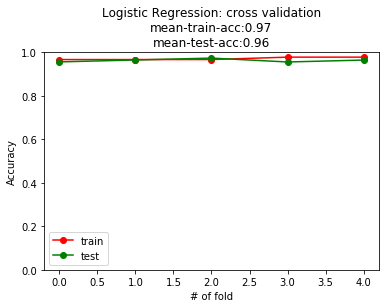

Decision Tree


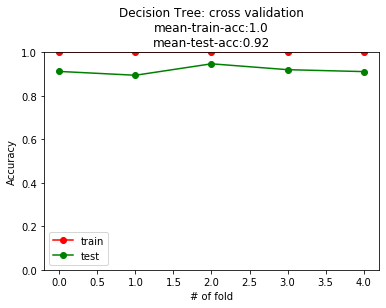

Random Forest


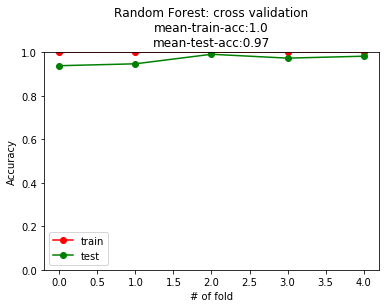

Extra Trees


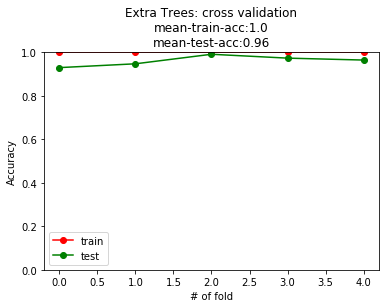

Gradient Boosting


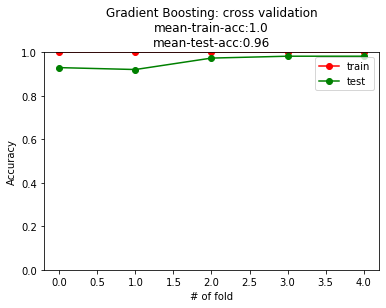

XGboost


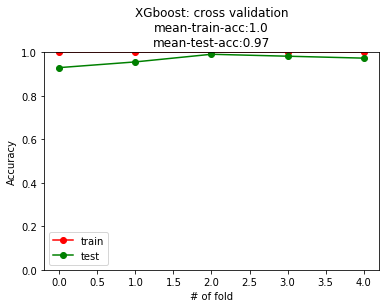

Naive Bayes


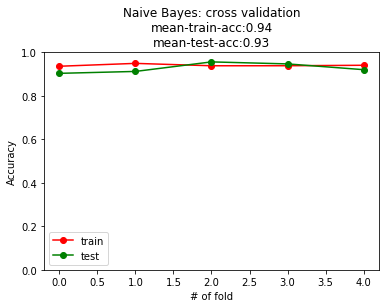

SVC


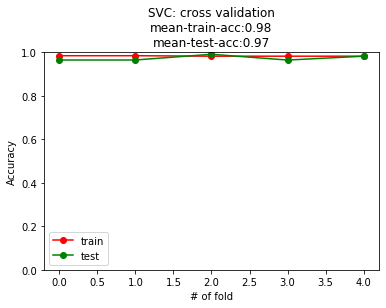

AdaBoost


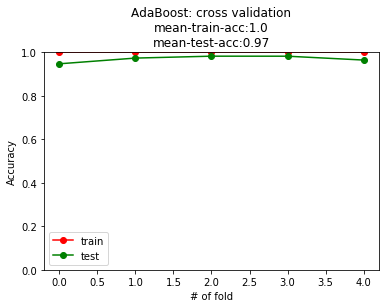

KNN


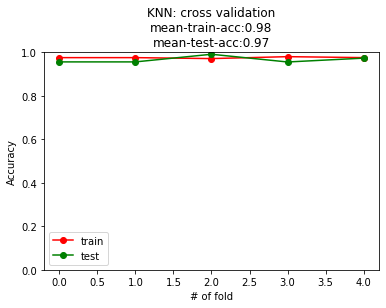

In [235]:
# Now with all features
# Which seems to have much better performance 
for model_name, model in models():
    result = cross_validate(model, X, y, scoring='accuracy', cv=5, return_estimator=True, return_train_score= True)
    print(model_name)

    plot_result(model_name, result)

In [417]:
# As We can see the best performance on the test test seems to has Ada Boost, KNN, Random Forest
# and XGBoost with 97% accuracy so there are 4 algorithms
# And the best performance is acquired using all features hence I will use them all.
# I will verify which one of them is indeed the best looking how they classify the data. 
# but first We need to split the data again
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((397, 30), (171, 30))

In [247]:
xgb = XGBClassifier()
ada = AdaBoostClassifier()
knn =KNeighborsClassifier()
rf =RandomForestClassifier()

In [248]:
# Fitting those 4 algorhitms to the data and evaluation
xgb.fit(X_train, y_train)
ada.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
ada_pred = ada.predict(X_test)
knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)

In [249]:
# XGBoost
print(classification_report(y_test,xgb_pred))
print('confusion matrix:')
print(confusion_matrix(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       112
           1       0.98      0.90      0.94        59

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171

confusion matrix:
[[111   1]
 [  6  53]]


In [250]:
# AdaBoost:
# Better accuracy and better performance when it comes to detect malignant tumor
# Comparing these two models Ada Boost has advantages over the XGBoost or has the same statistics like:
# recall for non malignant or macro avg
print(classification_report(y_test,ada_pred))
print('confusion matrix:')
print(confusion_matrix(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       112
           1       0.98      0.93      0.96        59

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

confusion matrix:
[[111   1]
 [  4  55]]


In [251]:
# KNeighborsClassifier:
# Worse than ADA Boost but when says benign is "always" right
print(classification_report(y_test,knn_pred))
print('confusion matrix:')
print(confusion_matrix(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       112
           1       1.00      0.88      0.94        59

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171

confusion matrix:
[[112   0]
 [  7  52]]


In [252]:
# Random Forest
# Almost like AdaBoost except classified one patient with Malignant tumor more incorrectly
print(classification_report(y_test,rf_pred))
print('confusion matrix:')
print(confusion_matrix(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       112
           1       0.98      0.92      0.95        59

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

confusion matrix:
[[111   1]
 [  5  54]]


In [111]:
# As We can see the best performance on the test test seems to has Ada Boost with 97% accuracy
# Let's visualize ROC and AUC score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import f1_score

AUC: 0.962


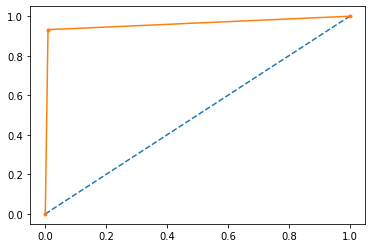

In [122]:
auc = roc_auc_score(y_test, ada_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, ada_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [ ]:
# Visualizing the most predictive variables of 2 best models
# I choosen AdaBoost as it's the best and XGboost to show theie most predictive features
# Doing this on scaled features

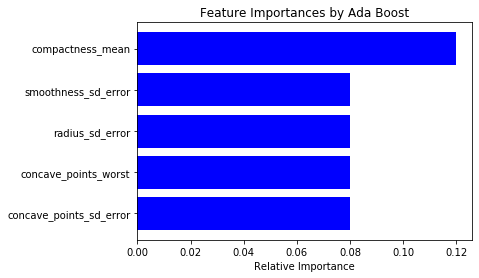

In [254]:
# First AdaBoost
features = X_train.columns
importances = ada.feature_importances_
indices = np.argsort(importances)[-5:]  # top 10 features
plt.title('Feature Importances by Ada Boost')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

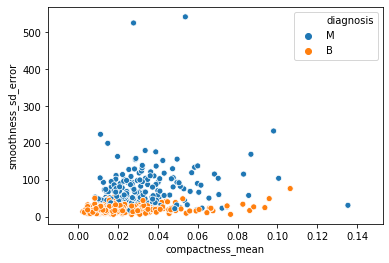

In [255]:
# the higher the smoothness_sd_error the most probably there is a malignant tumor
sns.scatterplot(x = 'compactness_mean', y = 'smoothness_sd_error', data = df, hue = 'diagnosis')

In [256]:
# For XGB I decided something else to extract two most important features
# Using RFE(Recursive feature elimination)
# The same as for ADABoost I take only 2 features
from sklearn.feature_selection import RFE

In [258]:
# Again I do this on train data
estimator = xgb
selector = RFE(estimator, 2, step=1)
selector = selector.fit(X_train, y_train)

In [259]:
selector.ranking_

array([22, 10, 28, 23, 15, 27, 24,  3, 25, 26, 13, 18, 29, 12, 20, 17, 11,
        8, 19, 16,  4,  6,  1,  1,  7,  9,  5,  2, 14, 21])

In [260]:
selector.get_support(indices=True)

array([22, 23], dtype=int64)

In [261]:
print(X.iloc[:,22:24].head(1))

   concave_points_sd_error  concave_points_worst
0                 0.539818              0.435214


In [ ]:
# for XGBoost the most important features are concave_points_sd_error and concave_points_worst

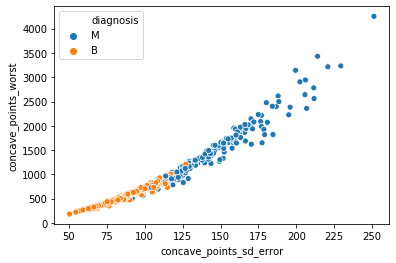

In [262]:
# The higher value of concave_points_sd_error and concave_points_worst
# the higher the probability that the patient has Malignant tumor
sns.scatterplot(x = 'concave_points_sd_error', y = 'concave_points_worst', data = df, hue = 'diagnosis')

# Explanation
To Technical Audiences
Explain the limitations of your analysis and identify possible further steps you could take.
To Non-Technical Audiences
Write a short summary of your analysis, explaining how your model works and how it performs.
Briefly explain the factors that contributed to malignant vs benign tumor identification.

In [518]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [519]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [521]:
ada = AdaBoostClassifier()

<module 'matplotlib.pyplot' from 'C:\\Users\\v-paszaf\\AppData\\Local\\Continuum\\anaconda3\\envs\\tensorflow_gpuenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

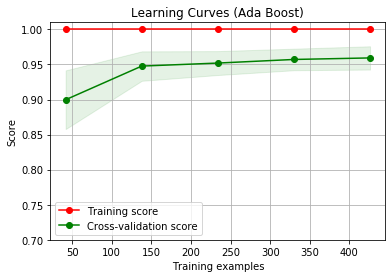

In [523]:
# To Technical Audiences
# Explain the limitations of your analysis and identify possible further steps you could take:

# As We can see the the getting more training samples the higher the score
# So the possible further steps would be to collect more data to improve the model performance even more
# and I could also do Exhaustive selector two find the best feature combination out of all the feature
# but it's very computational expensive.
title = "Learning Curves (Ada Boost)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)


plot_learning_curve(ada, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

In [ ]:
# Before I move to the next part I would like to check how deep learning model will perform on this data
# I'm going to build 3 models(small, medium and big and see which one of them performs the best)
# To select the best one I will be monitoring their loss and accuracy as well as their performance on test set.

In [412]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras import optimizers
from keras.optimizers import Adam
from keras.utils import to_categorical


In [447]:
# Small model
small_model = Sequential()
small_model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
small_model.add(Dense(16, activation='relu'))
small_model.add(Dense(2, activation='softmax'))
small_model.compile(Adam(lr=0.05),
              
              loss='categorical_crossentropy',
              metrics=['accuracy', 'categorical_crossentropy'])

small_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_59 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 34        
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________


In [414]:
# Here I'm creating the class to print "." during the training to spare space on the report
# and at the same time I want to be sure that the model is still training
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [418]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [419]:
small_history = small_model.fit(
  X_train, y_train,
  epochs=1000, validation_split = 0.3, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [420]:
small_model.evaluate(X_test, y_test)

171/171 [==============================] - 0s 58us/step


[0.1737798244943593, 0.9766081871345029, 0.1737798244943593]

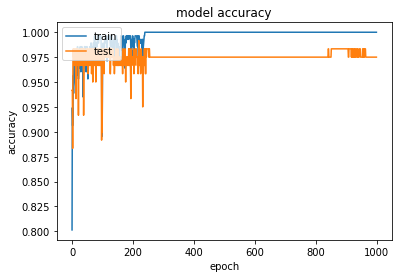

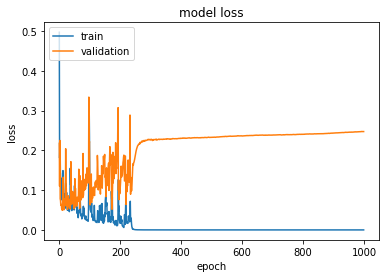

In [427]:
# As We can see after some epochs val_loss increases and model tends to overfit.

# summarize history for accuracy
plt.plot(small_history.history['acc'])
plt.plot(small_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(small_history.history['loss'])
plt.plot(small_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [422]:
# Medium model
medium_model = Sequential()
medium_model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
medium_model.add(Dense(32, activation='relu'))
medium_model.add(Dense(32, activation='relu'))
medium_model.add(Dense(2, activation='softmax'))
medium_model.compile(Adam(lr=0.05),
              
              loss='categorical_crossentropy',
              metrics=['accuracy', 'categorical_crossentropy'])

medium_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_50 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_51 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_52 (Dense)             (None, 2)                 66        
Total params: 3,170
Trainable params: 3,170
Non-trainable params: 0
_________________________________________________________________


In [423]:
medium_history = medium_model.fit(
  X_train, y_train,
  epochs=1000, validation_split = 0.3, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [433]:
medium_model.evaluate(X_test, y_test)

171/171 [==============================] - 0s 70us/step


[0.4931615713047032, 0.9649122807017544, 0.4931615713047032]

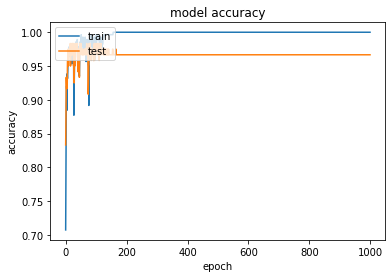

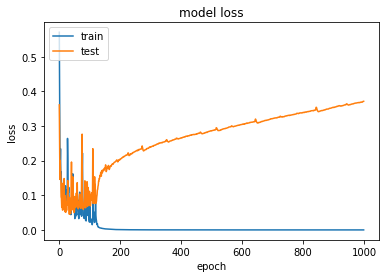

In [428]:
# Looks worse than the smaller one
# After some epochs accuracy drops and model tends to overfit.
# summarize history for accuracy
plt.plot(medium_history.history['acc'])
plt.plot(medium_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(medium_history.history['loss'])
plt.plot(medium_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [429]:
# Big model
big_model = Sequential()
big_model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
big_model.add(Dense(64, activation='relu'))
big_model.add(Dense(64, activation='relu'))
big_model.add(Dense(32, activation='relu'))
big_model.add(Dense(2, activation='softmax'))
big_model.compile(Adam(lr=0.05),
              
              loss='categorical_crossentropy',
              metrics=['accuracy', 'categorical_crossentropy'])

medium_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_50 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_51 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_52 (Dense)             (None, 2)                 66        
Total params: 3,170
Trainable params: 3,170
Non-trainable params: 0
_________________________________________________________________


In [430]:
big_history = big_model.fit(
  X_train, y_train,
  epochs=1000, validation_split = 0.3, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [432]:
big_model.evaluate(X_test, y_test)

171/171 [==============================] - 0s 64us/step


[0.6420823091651962, 0.6608187127531621, 0.6420823091651962]

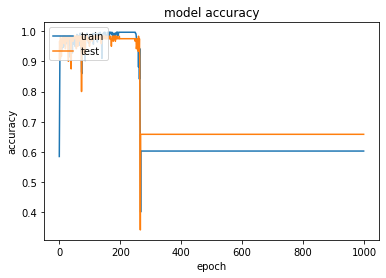

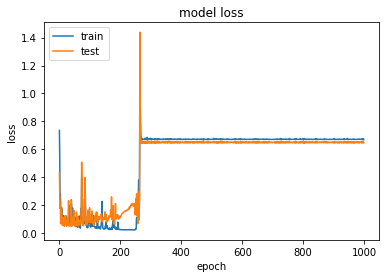

In [431]:
# As We can see after about2450 epochs the model's accuracy dropped tremendously.
# summarize history for accuracy
plt.plot(big_history.history['acc'])
plt.plot(big_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(big_history.history['loss'])
plt.plot(big_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Now come back to the small model.
# We have seen that after some epochs val_loss started to increase.
# Let's declare model once more but this time Keras Callbacks Early stop
# to monitor val_loss and stop model training once there is no improvement

In [448]:
# I set patience to 20 epochs
# Which means if there is no improvement since 20 epochs model stop training
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [449]:
small_history = small_model.fit(
  X_train, y_train,
  epochs=1000, validation_split = 0.3, verbose=0,
  callbacks=[PrintDot(), early_stop])


.......................................................................

In [450]:
small_model.evaluate(X_test, y_test)

171/171 [==============================] - 0s 76us/step


[0.054672483511729306, 0.9766081871345029, 0.054672483511729306]

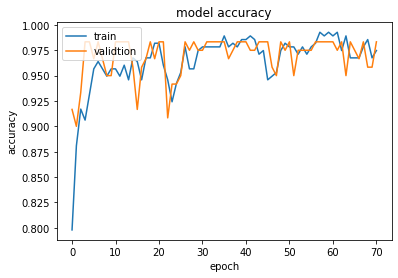

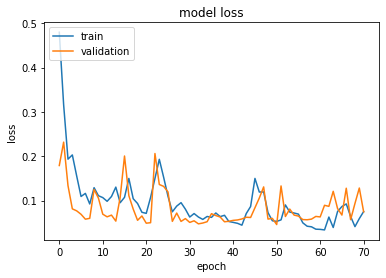

In [451]:
plt.plot(small_history.history['acc'])
plt.plot(small_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validtion'], loc='upper left')
plt.show()
plt.plot(small_history.history['loss'])
plt.plot(small_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [472]:
predictions = small_model.predict(X_test)

In [474]:
# Our model's predictions are probabilities
# We need to convert to (0,1) to display confusion matrix
# I will use numpy argmax function to do this.
predictions[0:5]

array([[9.8215151e-01, 1.7848462e-02],
       [9.9216992e-01, 7.8301309e-03],
       [9.9075842e-01, 9.2415437e-03],
       [9.9956208e-01, 4.3784306e-04],
       [8.6267793e-01, 1.3732198e-01]], dtype=float32)

In [462]:
predictions = np.argmax(predictions, axis=1)

In [470]:
# We also need to convert the y_test to it's primary form as it's transformed with Keras to categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [471]:
# As We can see the deep learning model has the best statistics,
# Better than AdaBoost
print(classification_report(y_test,predictions))
print('confusion matrix:')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       112
           1       0.97      0.97      0.97        59

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

confusion matrix:
[[110   2]
 [  2  57]]


In [ ]:
# To Non-Technical Audiences:
# The best predictive model is Keras ANN model, 
# but I decided to choose AdaBoost as the deep learning model 
# is hard to explain, especially for the non technical audience and the difference between them in performance
# is really slightly.
# AdaBoost is the ensamble model built with the lower predictive power models, one-node 
# tree classifiers so called stumps.
# Once more here is the confussion matrix of AdaBoost model:
# [[111   1]
# [  4  55]]

# So to be more precise:
# Our test sample consists of 171 patients,
# 112 with Benign tumor and 59 with malignant.
# Out of 112 with benign tumor patients our model correctly predicted 111 patients
# When it comes to patients with malignant tumor our model correctly predicted 55 cases out of 59

# Out of 32 features the biggest impact on if the patient has benign or malignant tumor seem to have features like:
# - concave_points_sd_error
# - concave_points_worst
# - smoothness_sd_error

# The biiger the value of the one of those features the higher probability that the patient has a malignant tumor

# PART 2


In your notebook, move onto "Part 2" and log your responses accordingly. Please provide feedback for both of the sample student submissions provided below. Use the following guidelines to help structure your responses:

In [274]:
# First let me see the dataset
df2 = pd.read_csv('part2.csv')
df2.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [271]:
df2.shape

(10000, 12)

In [272]:
df2.ContractType.value_counts()

full_time    2978
part_time     578
Name: ContractType, dtype: int64

In [276]:
df2.ContractType.isnull().sum()

6444

In [279]:
df2.SalaryNormalized.isnull().sum()

0

In [ ]:
# First student sample:


# import pandas as pd
# import numpy as np
# from sklearn import LinearRegression
# from sklearn.cross_validation import cross_val_score

# # Load data
# d = pd.read_csv('../data/train.csv')


# # Setup data for prediction
# x1 = data.SalaryNormalized
# x2 = pd.get_dummies(data.ContractType)

# # Setup model
# model = LinearRegression()

# # Evaluate model
# from sklearn.cross_validation import cross_val_score
# from sklearn.cross_validation import train_test_split
# scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
# print(scores.mean())



# Coments:
# It's a regression and our independent variable is 0,1. 
# Dependent variable should be correlated with independent variable - would be good to look for other dependent variable
# pd.get_dummies(data.ContractType) not gonna work as the data frame is ascribed to "d"
# so We need to declare for "d" or pd.get_dummies(d.ContractType)
# As independent variable ContractType is choosen, there is a lot of missing values
# We could use imputation function but I would recommend choose other independent variable
# or eventually drop all missing values
# - imported numpy but has not been used.
# - cross_val_score imported twice which seems senseless
# - train_test_split imported(which does not seems neccesary as we use cross validation here)
# - only one split in cross validation which seems senselesscas we are checking the model performance,
# I would recommend it 3 times. This dataset is big so We can go with 10 folds but it could be 
# computationally expensive due to it's size
# dependent variable is called x2, usually it's as "y"
# instead of applying get dummies We can do it using dictionary and map function, example:
# a = {'full_time':1, 'part_time': 0}
# x2 = x2.map(a)

In [ ]:
# Second student sample:

# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.cross_validation import cross_val_score

# # Load data
# data = pd.read_csv('../data/train.csv')


# # Setup data for prediction
# y = data.SalaryNormalized
# X = pd.get_dummies(data.ContractType)

# # Setup model
# model = LinearRegression()

# # Evaluate model
# scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
# print(scores.mean())


# Comments:
# It's a regression and our independent variable is 0,1. 
# Dependent variable should be correlated with independent variable - would be good to look for other dependent variable
# As independent variable ContractType is choosen, there is a lot of missing values
# We could use imputation function but I would recommend choose other independent variable
# or eventually drop all missing values
# Rest of the features seem to be strings. I could suggest to do some feature engineering to extract some 
# information and try to use them in the model.
# Alternatively We could try NLP technigues to convert the non numerical values.